# **Heart disease prediction using**

### Step - 1 import all modules

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import warnings
import IPython
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

warnings.filterwarnings("ignore")


### Step-2 Load data

In [100]:
df= pd.read_csv(r"C:\Users\divya\OneDrive\Documents\GitHub\projet\heat-disease\heart.csv")

### Step-3 Understanding Data Using EDA

In [101]:
#3.1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
#3.2
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [103]:
#3.3
df.shape

(303, 14)

In [104]:
#3.4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [105]:
#3.5 data column
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

#### 3.7 Checking Null Value

In [106]:
df.isna().sum()
#no null values founded
#so we not have to remove, fill columns 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 3.8 column description

In [107]:
df.describe()
#this will give the complete description about the column min, max, etc.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 3.12 target vs feature

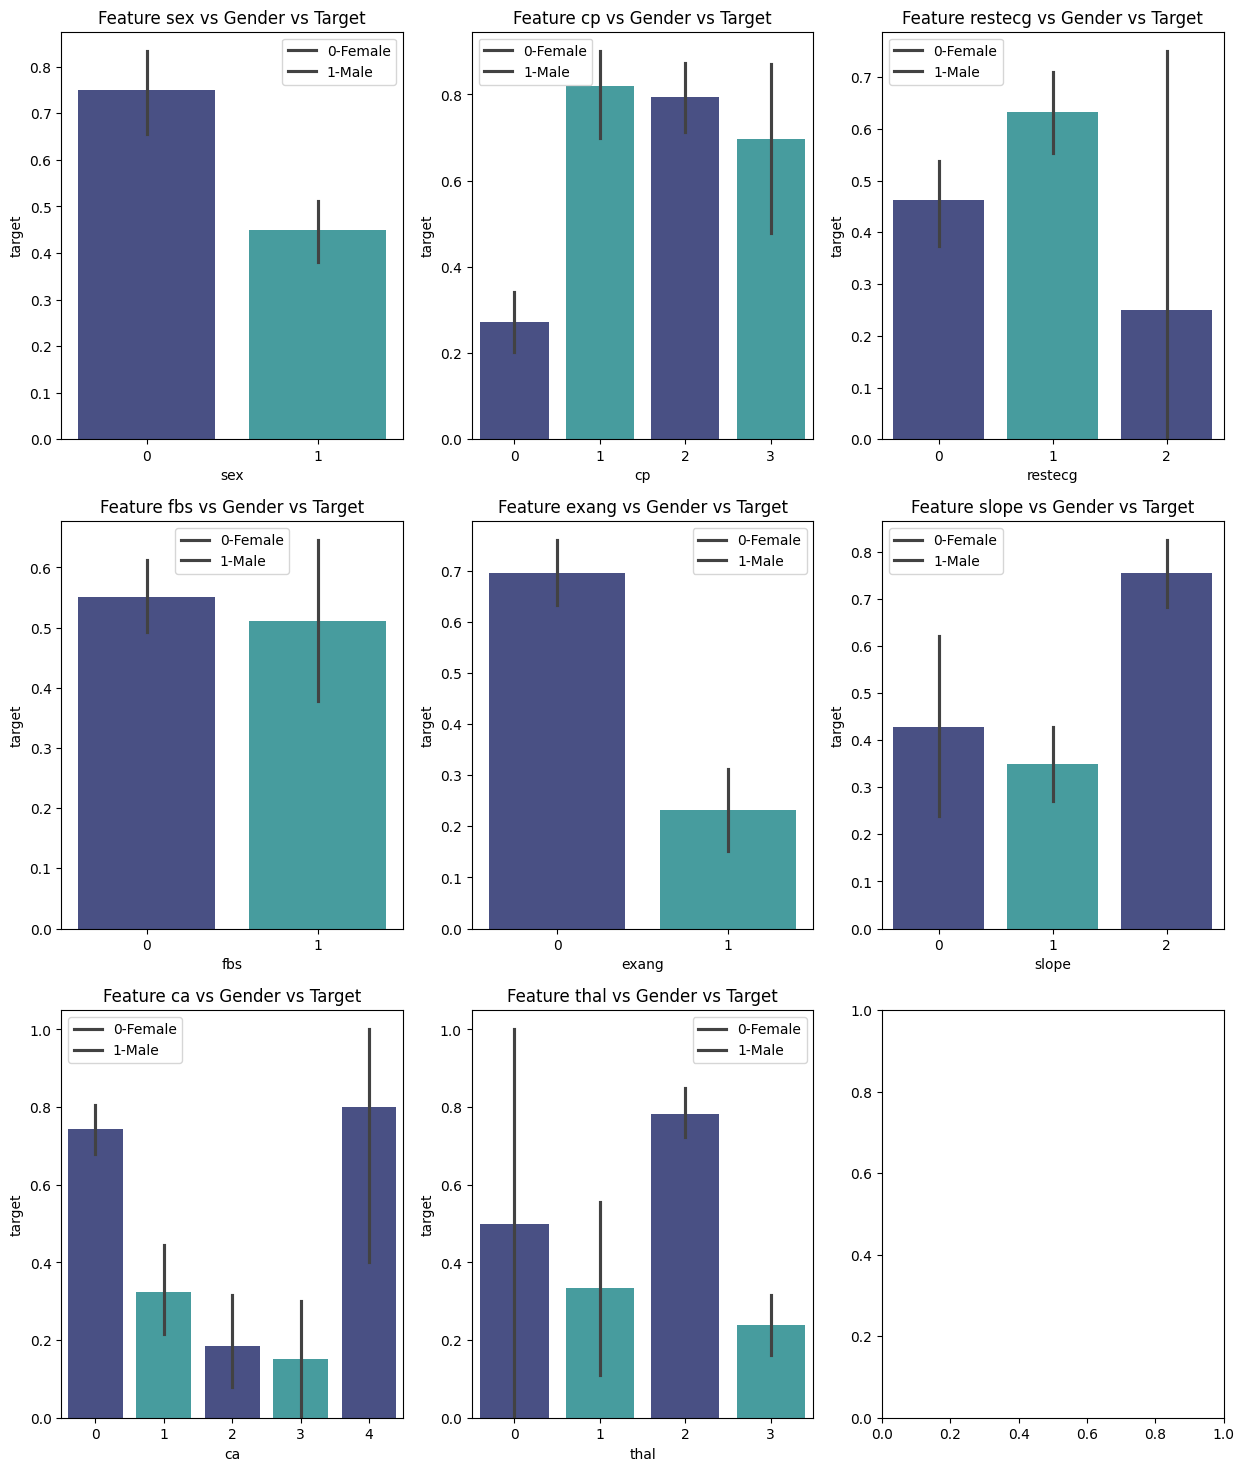

In [108]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,18))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(["0-Female","1-Male"])
    except:
        ...
plt.show()


## Step - 4 Divide data into testing and training

In [109]:
#4.1 Divide data into target and feature
X=df.iloc[:,:-1]
y=df["target"]

In [110]:
X.shape, y.shape

((303, 13), (303,))

In [111]:
#4.2 Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #here we divide the data into 80% and 20%. 20% is for testing

In [112]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(242, 13) (61, 13) (242,) (61,)


## Step-5 Create Multi-Model 

In [113]:
#because target value is only have 1 and 0 so we use binary classification


#### 5.1 Logistic Regression Model

In [114]:
#5.1.1 model creation
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train) #train the model 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [115]:
y_pred=model_lr.predict(X_test)

In [116]:
#5.1.2 import model evalution metrics 
#it will call when the problem is classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [117]:
#5.1.3 import confusion matrix to evaluate classification model
from sklearn.metrics import confusion_matrix

In [118]:
cm=confusion_matrix(y_test,y_pred) #here we have 4 type 1 error and 3 type 2 error

Text(50.722222222222214, 0.5, 'Actuall value')

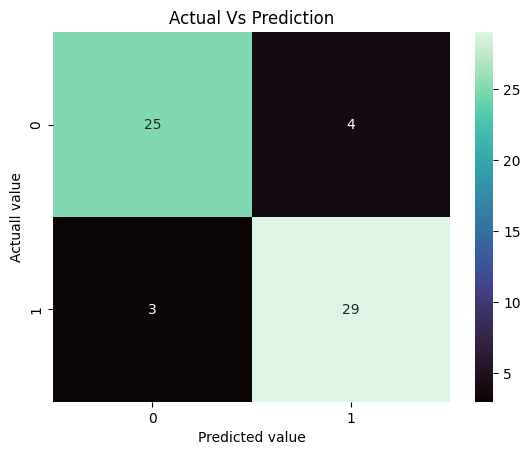

In [119]:
plt.title("Actual Vs Prediction")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [120]:
cm.ravel()

array([25,  4,  3, 29])

In [121]:
TN,FP,FN,TP= cm.ravel()

In [122]:
ps=precision_score(y_test,y_pred)
print("precision score : ",ps)

precision score :  0.8787878787878788


In [123]:
accuracy_score(y_test,y_pred)

0.8852459016393442

In [124]:
rs=recall_score(y_test,y_pred)
print("Recall Score : ",rs)

Recall Score :  0.90625


In [125]:
f1=f1_score(y_test,y_pred)
print("F1 Score : ",f1)

F1 Score :  0.8923076923076924


In [126]:
#for calculating all score we can use classification score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [127]:
#5.1.4 checking model score
lr_score=model_lr.score(X_test,y_test) #model score and accuracy score are same
lr_score

0.8852459016393442

In [128]:
#with this our LogisticRegression model is end 

#### 5.2 Naive Bayes ML model

In [129]:
#This model pre assumption : It will pre assume No correlation b/w features
#This model is base on bayes theorem 

In [130]:
#5.2.1 import module
from sklearn.naive_bayes import GaussianNB 
#GaussianNB is used when we have binary classifiaaction
#MultinomialNB is used when we have multi class classification
#since we have binary classification so here we used GaussianNB 

In [131]:
model_nv=GaussianNB()
model_nv.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [132]:
y_pred=model_nv.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [133]:
nv_score=model_nv.score(X_test,y_test)
print("Naive Bayes score : ",nv_score)

Naive Bayes score :  0.8688524590163934


In [134]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.8688524590163934
Precision score :  0.9
Recall Score :  0.84375
F1 Score :  0.8709677419354839


Text(50.722222222222214, 0.5, 'Actuall value')

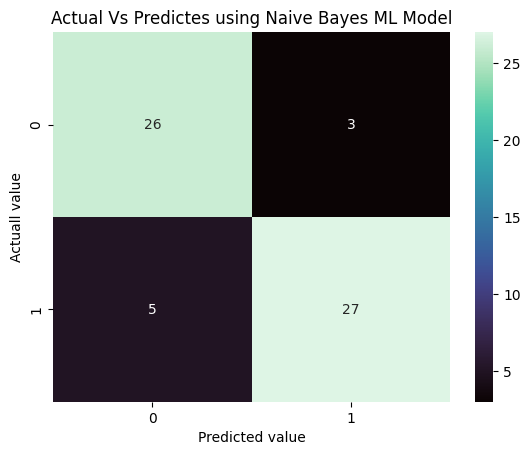

In [135]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using Naive Bayes ML Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### 5.3 Support Vector machine (SVM) Model

In [137]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

#### 5.3.1 Import Module

In [138]:
from sklearn.svm import SVC

In [139]:
model_svc= SVC()
model_svc.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [140]:
#5.3.2
y_pred=model_svc.predict(X_test)

#### 5.3.3 checking scores and confussion matrics

In [141]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.7049180327868853
Precision score :  0.6666666666666666
Recall Score :  0.875
F1 Score :  0.7567567567567568


In [142]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



Text(50.722222222222214, 0.5, 'Actuall value')

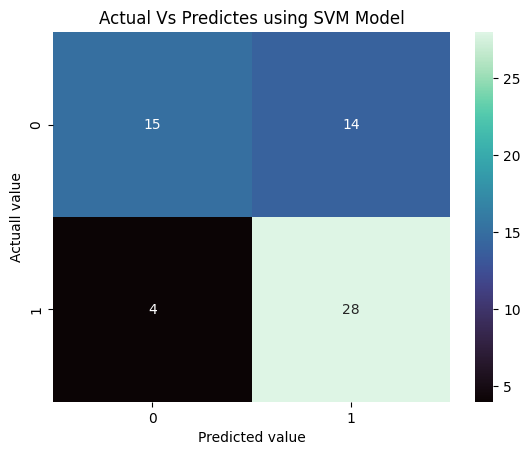

In [143]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using SVM Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [144]:
svc_score= accuracy_score(y_test,y_pred)

In [145]:
print(lr_score,nv_score,svc_score)

0.8852459016393442 0.8688524590163934 0.7049180327868853


### Step 5.4 decision tree ml model

### 5.4.1 import module

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
# 5.4.2 model creation
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [148]:
y_pred=model_dt.predict(X_test)

In [149]:
#5.4.2 checking score
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.819672131147541
Precision score :  0.8888888888888888
Recall Score :  0.75
F1 Score :  0.8135593220338984


In [150]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



Text(50.722222222222214, 0.5, 'Actuall value')

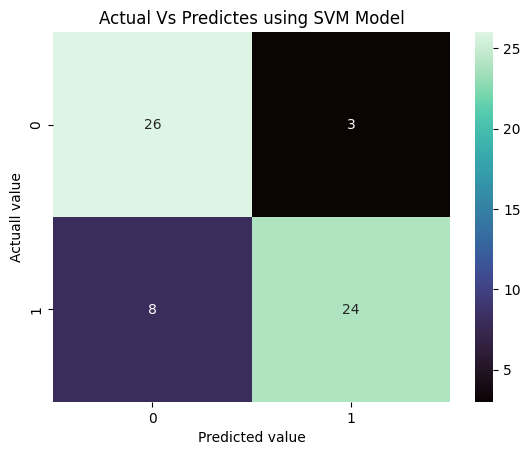

In [151]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using SVM Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

In [152]:
dt_score=model_dt.score(X_test,y_test)
dt_score

0.819672131147541

In [153]:
from sklearn.tree import plot_tree

In [154]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

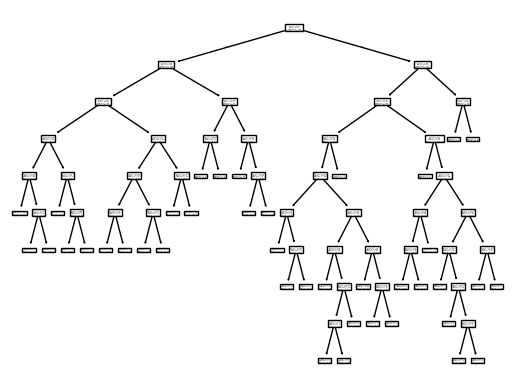

In [155]:
plot_tree(model_dt)
plt.show

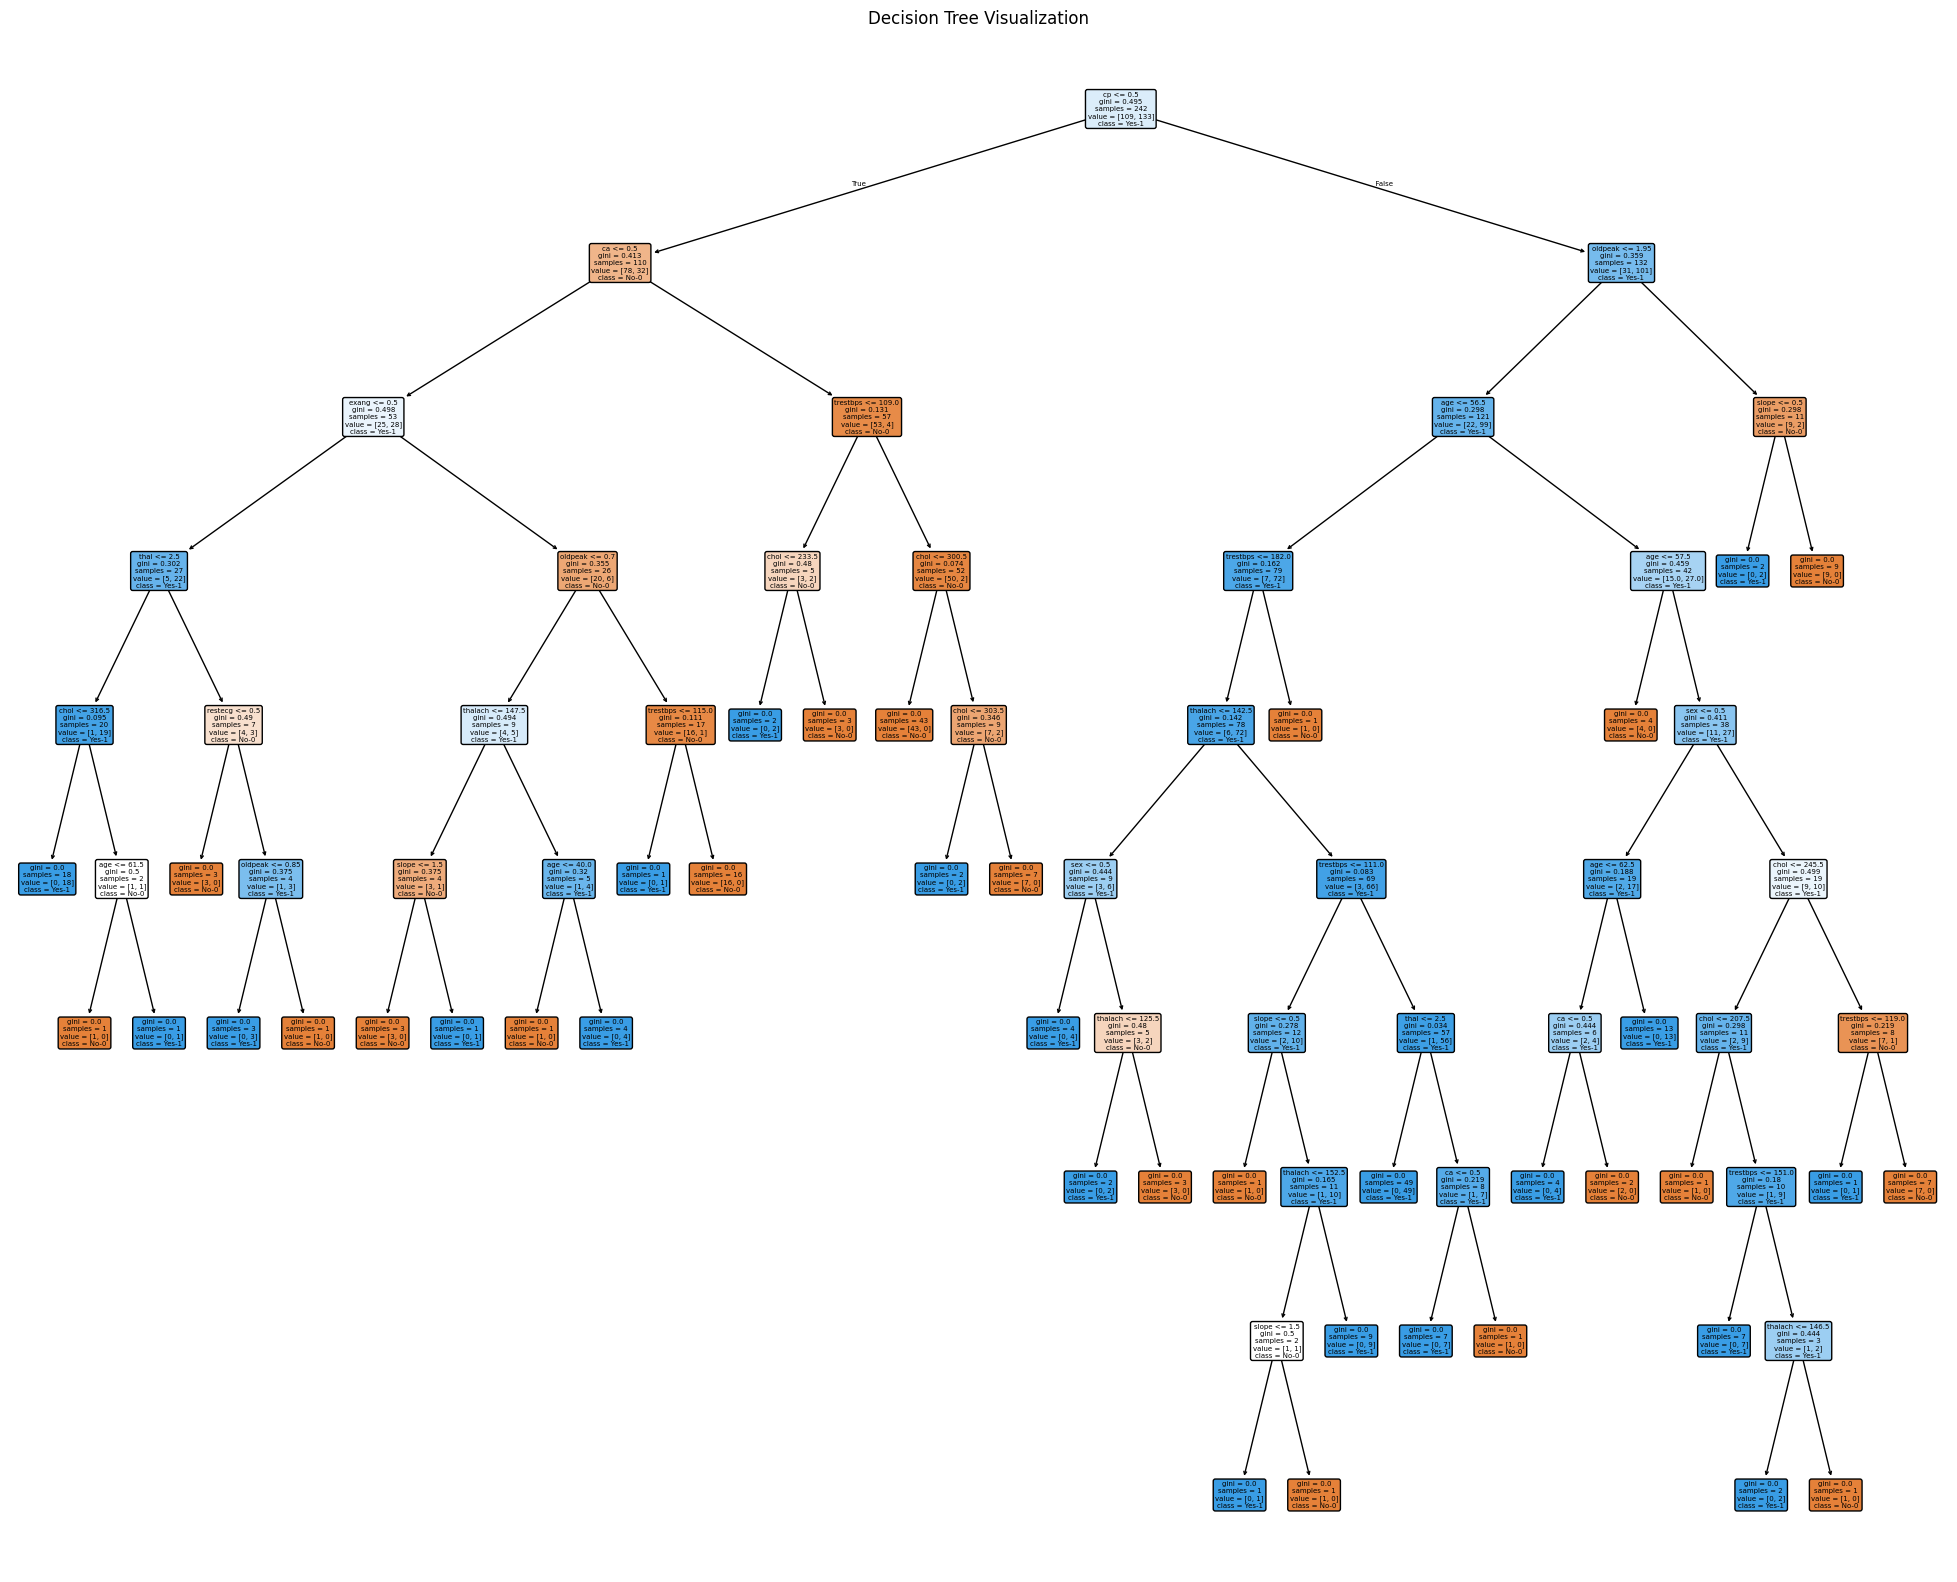

In [156]:
plt.figure(figsize=(25, 20)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### 5.5 Rnadom Forest

##### 5.5.2 import module

In [157]:
from sklearn.ensemble import RandomForestClassifier


In [158]:
model_rf= RandomForestClassifier()
model_rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [159]:
#5.5.3
y_pred=model_rf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [160]:
#### Score
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Precision score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Accuracy score :  0.8524590163934426
Precision score :  0.8484848484848485
Recall Score :  0.875
F1 Score :  0.8615384615384616


In [161]:
rf_score=model_rf.score(X_test,y_test)

Text(50.722222222222214, 0.5, 'Actuall value')

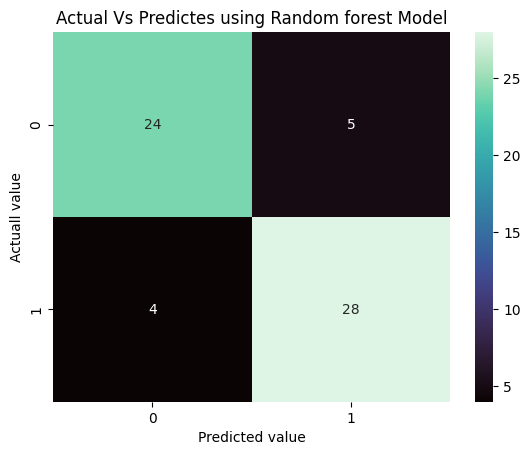

In [162]:
#5.5.4
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using Random forest Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

### 5.7 KNN --> k Neareast Neighbors

In [163]:
# knn work on distance and it work for both regression and classification

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [166]:
y_pred=model_knn.predict(X_test)

In [167]:
knn_Score=model_knn.score(X_test,y_test)
knn_Score

0.7049180327868853

Text(50.722222222222214, 0.5, 'Actuall value')

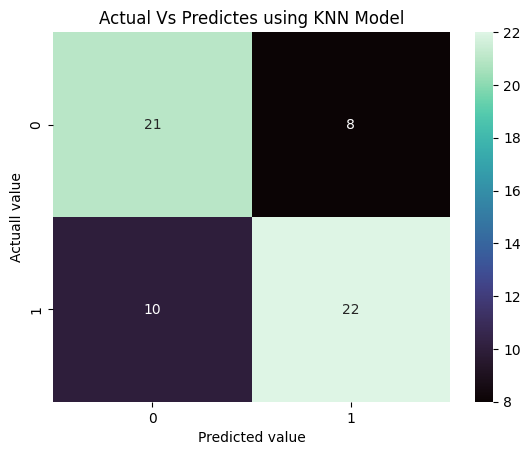

In [168]:
cm= confusion_matrix(y_test,y_pred)
plt.title("Actual Vs Predictes using KNN Model")
sns.heatmap(cm,annot=True,cmap="mako")
plt.xlabel("Predicted value")
plt.ylabel("Actuall value")

### Step 6 Score Compare

In [174]:
all_model_score  = [lr_score,nv_score,svc_score,dt_score,rf_score,knn_Score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','Knn']

print('Done')

Done


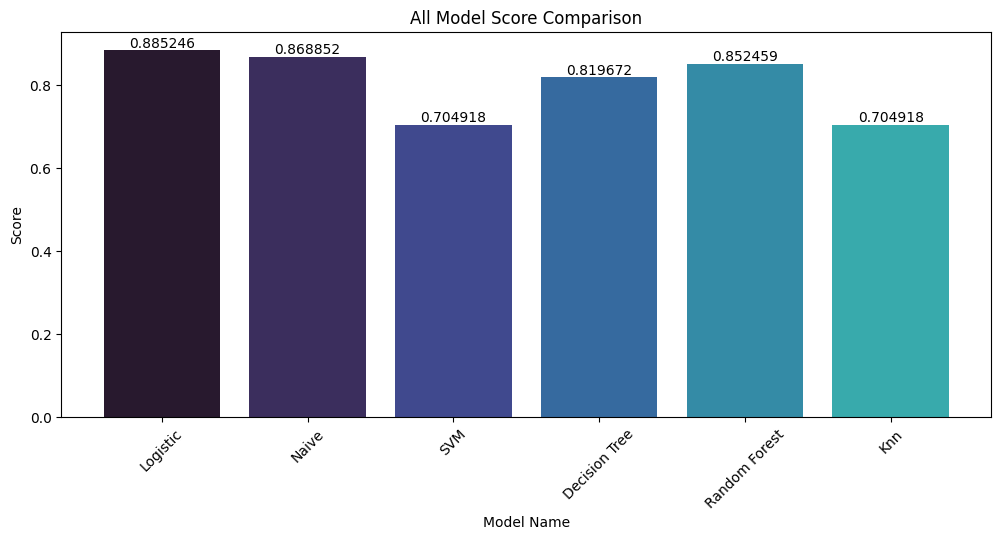

In [175]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Step 7 Save best model

In [176]:
#since our lr model give heighest score so we save lr

In [177]:
import pickle

In [178]:
with open("Heart_disease_pred.pkl",'wb') as f:
    pickle.dump(model_lr,f)